# Finding Heavy Traffic Indicators on I-94


In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94) 
connecting the Great Lakes and northern Great Plains regions of the U.S. The dataset was made available by John Hogue and can be downloaded from [this repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94, such as weather type, day of the week, hour, etc.
### Summary of Results
We found out that the traffic is most intense in the daytime, warm months, and business days, especially  6.00-8.00 and 16.00-17.00. Temperature doesn't influence traffic intensity, while some relatively light weather conditions do. The lowest average traffic volume is related to 2016, followed by the maximum peak in 2017. Of all the holidays, the heaviest traffic is related to Columbus Day, the lightest one – to Christmas Day and New Year.



![banner](https://static.dw.com/image/40916907_605.jpg)


## Dataset Downloading and Initial Analysis


In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#When we use Matplotlib inside Jupyter, we also need to add the %matplotlib inline magic — this enables Jupyter to generate the graphs.

In [12]:
# Load in data
mitv = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [13]:
mitv.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [14]:
mitv.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [15]:
mitv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [16]:
mitv.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [17]:
mitv['holiday'].value_counts()

None                         48143
Labor Day                        7
Martin Luther King Jr Day        6
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Washingtons Birthday             5
Veterans Day                     5
Memorial Day                     5
Columbus Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

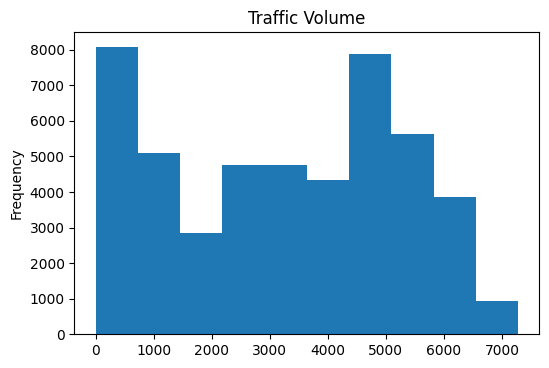

In [18]:
mitv['traffic_volume'].plot.hist()
plt.title('Traffic Volume')
plt.show()

In [19]:
mitv['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic volume distributed fairly evenly every hour, somethimes increased to about 7000 transportations in rush hour.

In [20]:
mitv['date_time'] = pd.to_datetime(mitv['date_time']) #it used to be object
mitv['hour'] = mitv['date_time'].dt.hour

# Isolate day and night
day = mitv.copy()[(mitv['hour'] >= 7) & (mitv['hour'] < 19)]
night = mitv.copy()[(mitv['hour'] < 7) | (mitv['hour'] >= 19)]

# Unique values in the dataset
print('Day hours: \n', day['hour'].unique())
print('-' * 40)
print('Night hours: \n', night['hour'].unique())

Day hours: 
 [ 9 10 11 12 13 14 15 16 17 18  8  7]
----------------------------------------
Night hours: 
 [19 20 21 22 23  0  1  2  3  4  5  6]


(0.0, 8000.0)

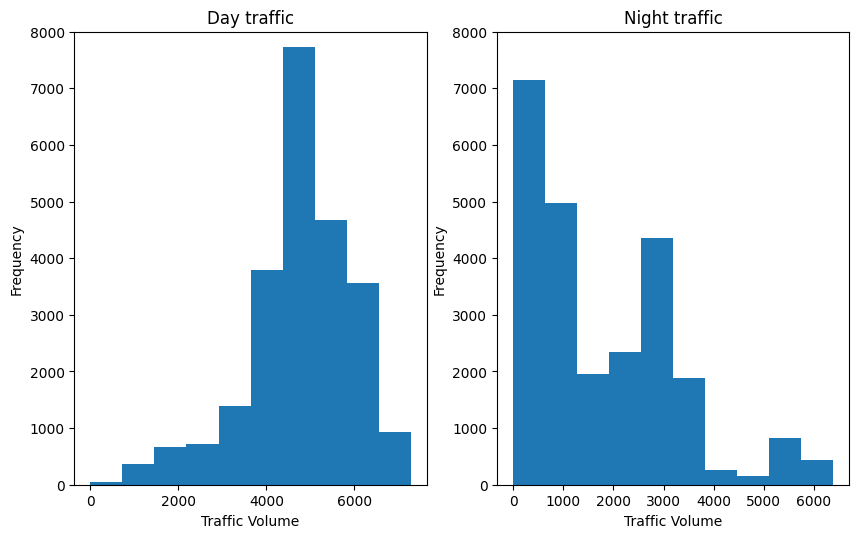

In [21]:
plt.figure(figsize = (10, 6))

# The first subplot - day
plt.subplot(1, 2, 1)
plt.title('Day traffic')
plt.hist(day['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0, 8000])  # the same ranges 

# The second subplot - night
plt.subplot(1, 2, 2)
plt.title('Night traffic')
plt.hist(night['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0, 8000])  

In [22]:
# Day and Night Statistics

print("Day Traffic:", "\n", day["traffic_volume"].describe())
print("-" * 40)
print("Night Traffic:", "\n", night["traffic_volume"].describe())

Day Traffic: 
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
----------------------------------------
Night Traffic: 
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


75% in day is more 5559 transports but that in night is only 2819. Every statistics in day are bigger than those in night. 

### **Time Indicators**

In [23]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

(4000.0, 5000.0)

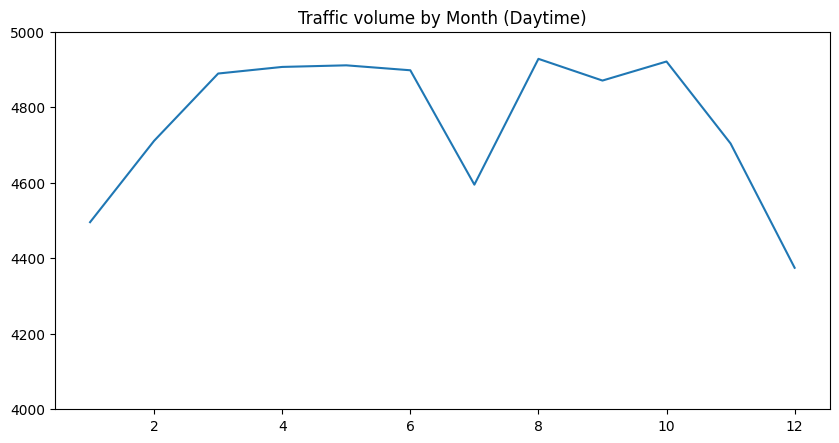

In [30]:
plt.figure(figsize=(10,5))
plt.plot(by_month['traffic_volume'])
plt.title("Traffic volume by Month (Daytime)")
plt.ylim(4000,5000)

The traffic volume in warm months in year like Mar - June and Aug - Oct is more busier than that in the cold months. Apart from July, there may be in summer holidays and children don't have to go to school.


Day of week

In [31]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

(3000.0, 5500.0)

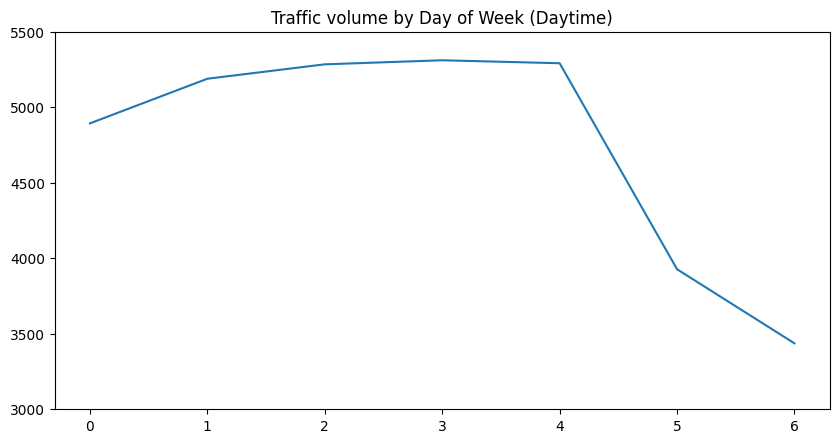

In [32]:
plt.figure(figsize=(10,5))
plt.plot(by_dayofweek['traffic_volume'])
plt.title("Traffic volume by Day of Week (Daytime)")
plt.ylim(3000,5500)

The traffic volume is significantly heavier on business days (0-4) compared to the weekends (5, 6).

In [33]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(7.0, 18.0)

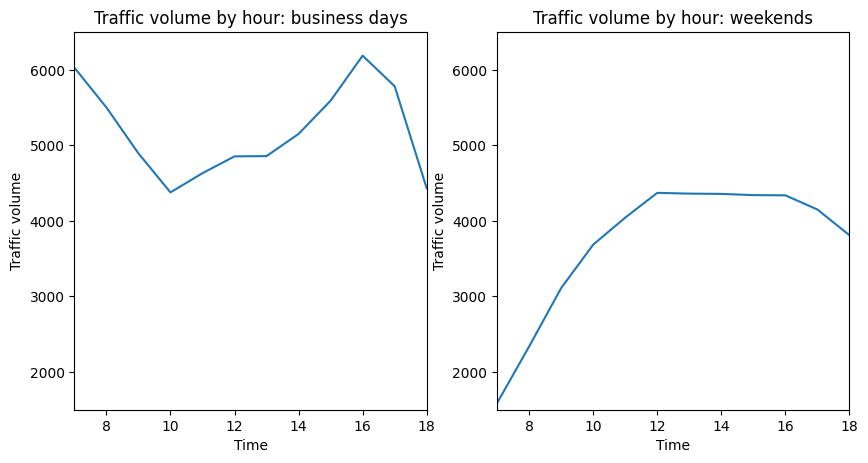

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Traffic volume by hour: business days')
plt.plot(by_hour_business['traffic_volume'])
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.ylim([1500, 6500]) 
plt.xlim(7,18)

plt.subplot(1, 2, 2)
plt.title('Traffic volume by hour: weekends')
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.ylim([1500, 6500]) 
plt.xlim(7,18)


The traffic is heavier on business days for almost all daytime hours with respect to weekends. For business days, there are 2 clear peaks: 7.00-8.00 and 16.00-17.00, both related to rush hours when people go to work and back. As for weekends, there are no peaks on the plot, and the traffic gradually increases from 7.00 till 12.00, when it reaches a plateau and from 16.00 starts decreasing.

All in all, we found the following time indicators of more intense traffic:
- warm months,
- business days,
- time:
    - 7.00-8.00 and 16.00-17.00 on business days, 
    - 12.00-16.00 on weekends.
    
In addition, we discovered a sharp traffic volume reduction in 2016, presumably due to road expansion works, followed by the highest peak in 2017.    
## Weather Indicators
Another possible indicator of heavy traffic is the weather. We can find information about the weather in the following columns: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`. The first 4 of them are numerical, so let's try to figure out how they correlate with `traffic_volume`.

In [49]:
round(day.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']], 3)

temp          0.128
rain_1h       0.004
snow_1h       0.001
clouds_all   -0.033
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation (even though very low anyway) with traffic volume. Let's plot these two variables against each other:

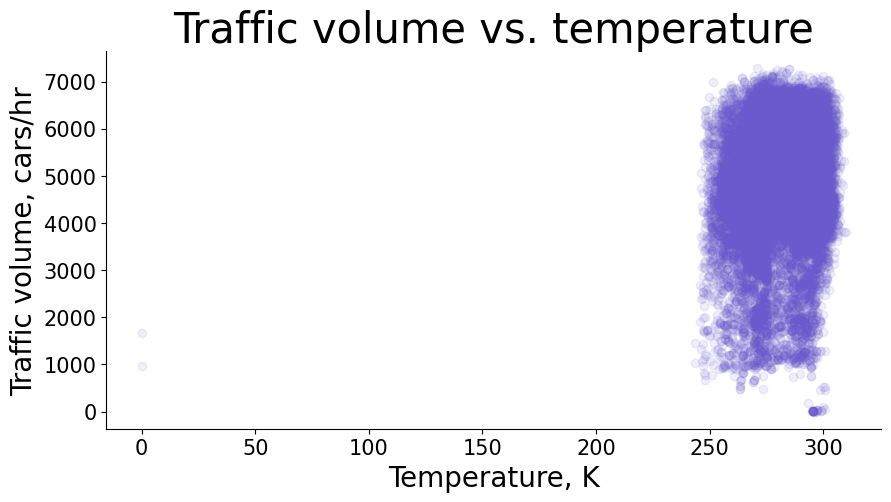

In [53]:
def create_scatter_plot(df, column, title, xlabel, xmin=None, xmax=None):
    plt.figure(figsize=(10,5))
    plt.scatter(df[column], df['traffic_volume'], color='slateblue', alpha=0.1)
    plt.title(title, fontsize=30)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel('Traffic volume, cars/hr', fontsize=20)
    plt.xlim(xmin,xmax)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    sns.despine()

# Plotting traffic volume vs. temperature
create_scatter_plot(df=day, column='temp',
                    title='Traffic volume vs. temperature',
                    xlabel='Temperature, K')

There are 2 wrong values of temperature to be ignored.

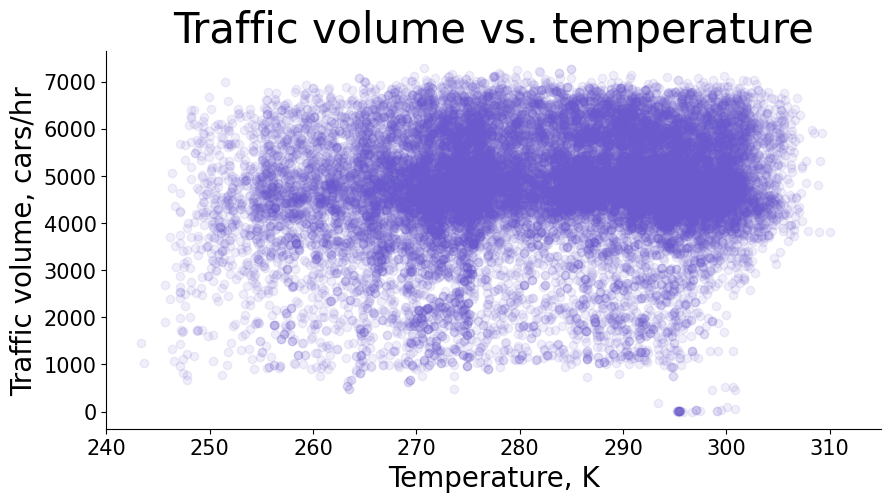

In [54]:
# Plotting traffic volume vs. temperature
create_scatter_plot(df=day, column='temp',
                    title='Traffic volume vs. temperature',
                    xlabel='Temperature, K', xmin=240, xmax=315)

Now we can conclude that actually there is no valid correlation between temperature and traffic volume, meaning that temperature isn't a reliable indicator for heavy traffic, not to mention other 3 numerical weather columns (`rain_1h`, `snow_1h`, and `clouds_all`) that showed very lower Pearson correlation coefficient. To see if we can find more useful data, we'll look next at the categorical weather columns: `weather_main` and `weather_description`.
## Weather Types
We're going to calculate and plot the average traffic volume associated with each weather type, i.e. each unique value in the columns `weather_main` and `weather_description`.

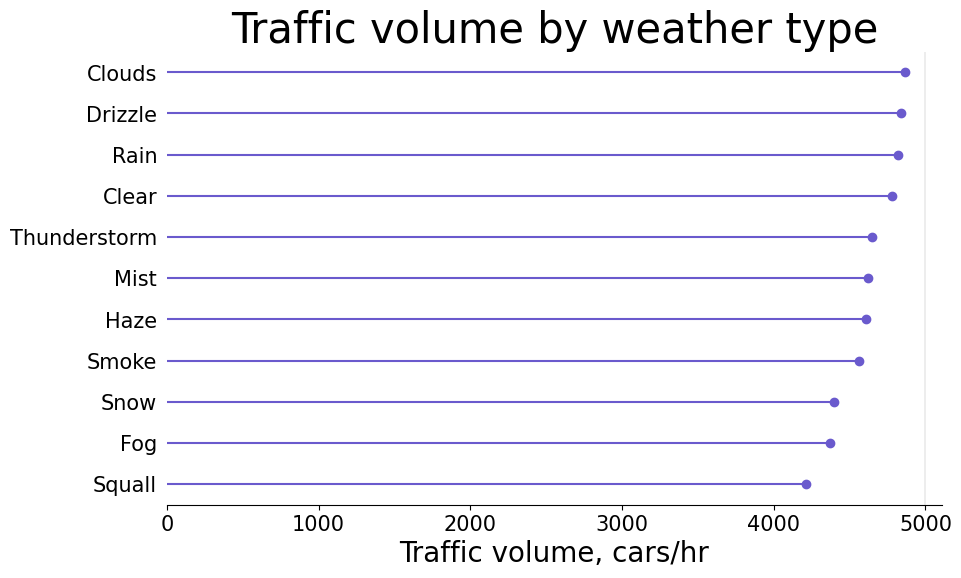

In [55]:
by_weather_main = day.groupby('weather_main').mean().sort_values('traffic_volume')
by_weather_description = day.groupby('weather_description').mean().sort_values('traffic_volume')

def create_stem_plot(df, fig_height,
                     title='Traffic volume by weather type',
                     ymin=None, ymax=None, vert_line=5000):
    plt.figure(figsize=(10,fig_height))
    plt.hlines(y=df.index,
               xmin=0, xmax=df['traffic_volume'],
               color='slateblue')
    plt.plot(df['traffic_volume'], df.index,
             'o', c='slateblue')
    plt.title(title, fontsize=30)
    plt.xlabel('Traffic volume, cars/hr', fontsize=20)
    plt.ylabel(None)
    plt.xlim(0,None)
    plt.ylim(ymin,ymax)
    plt.tick_params(left=False)
    plt.axvline(x=vert_line, color='grey', linewidth=0.2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    sns.despine(left=True)

# Plotting traffic volume by weather type
create_stem_plot(df=by_weather_main, fig_height=6)

There are no weather types where traffic volume exceeds 5,000 cars/hr, so we cannot identify any heavy traffic indicator from the `weather_main` column. Let's plot the results for the `weather_description` column instead:

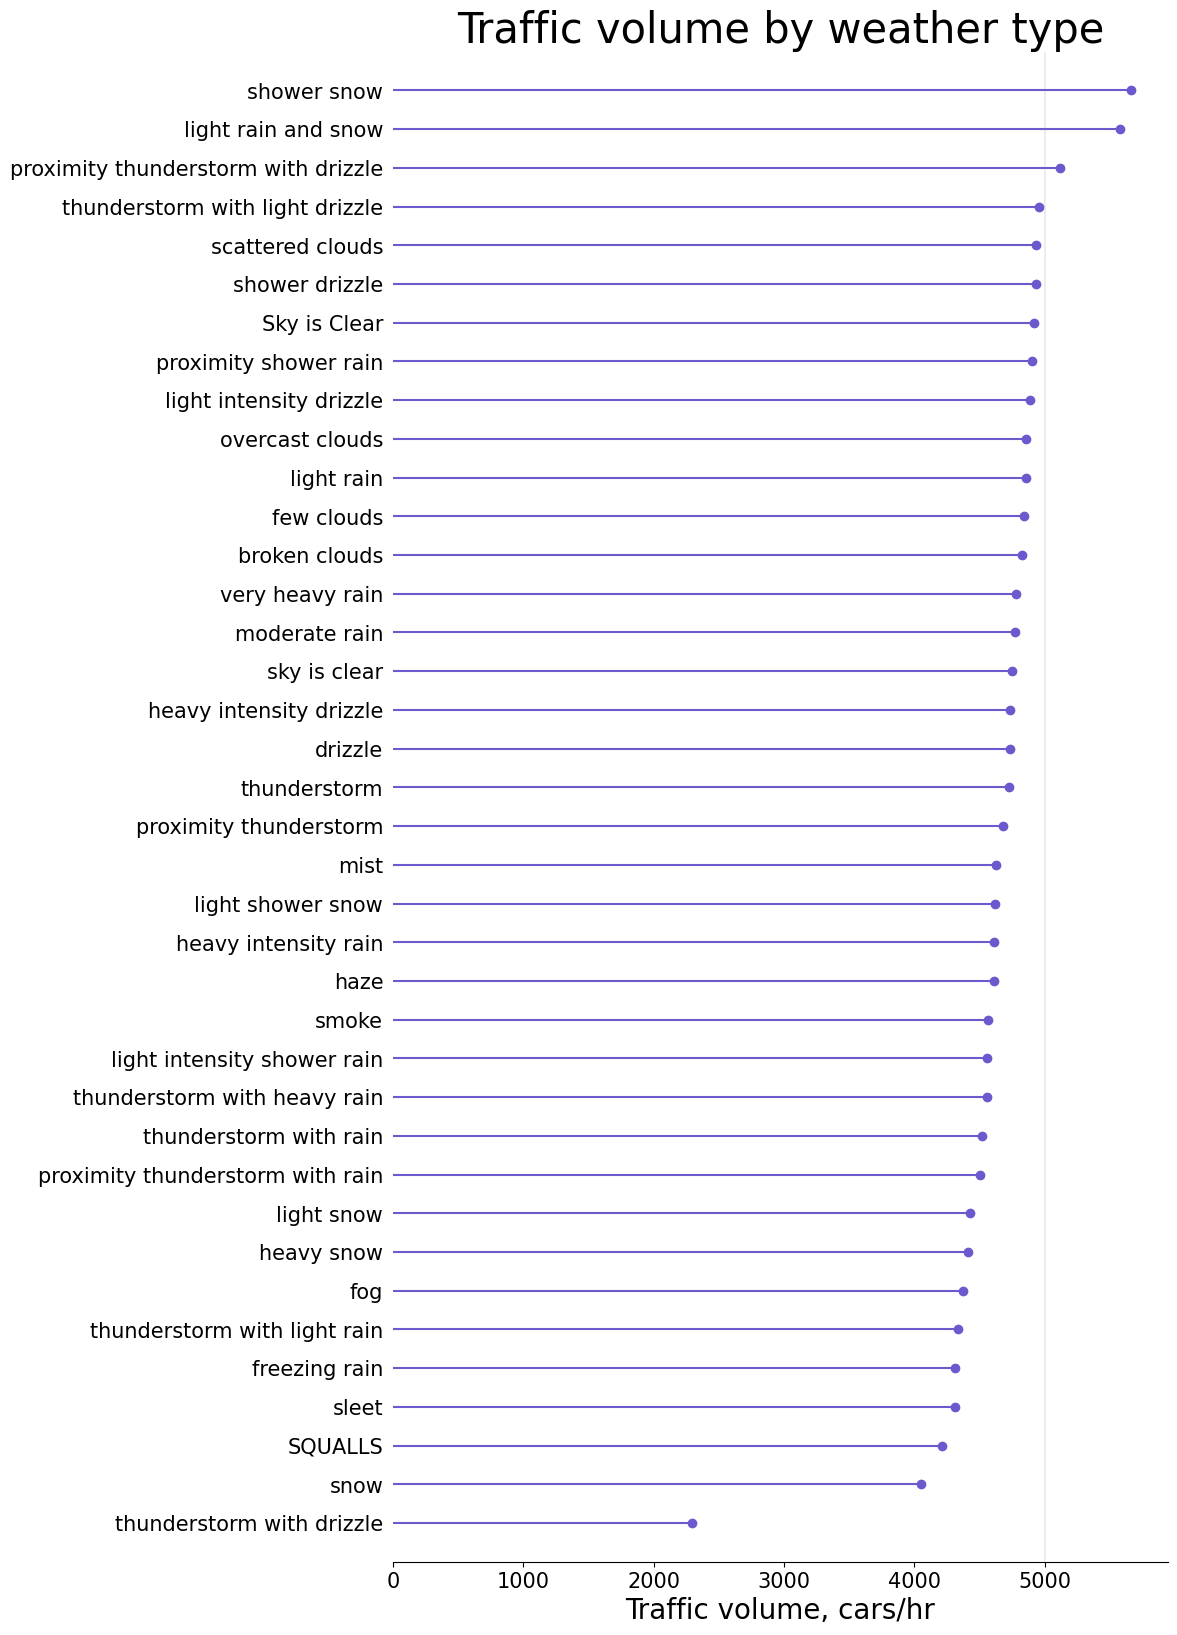

In [56]:
# Plotting traffic volume by weather type (detailed)
create_stem_plot(df=by_weather_description, fig_height=20,
                 ymin=-1, ymax=38)

In this case, we can identify the following 3 weather types that led to heavy traffic of more than 5,000 cars/hr:
- shower snow,
- light rain and snow,
- proximity thunderstorm with drizzle.

The results look surprising: evidently, there are many other weather types in the dataset representing much worse weather where traffic is much lighter. One possible explanation here is that really bad weather conditions (thunderstorms, very heavy rain, squalls, etc.) are usually forecast in advance, so people try to do their best not to travel by car on such days.

-----
The second solution of the last exploration:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

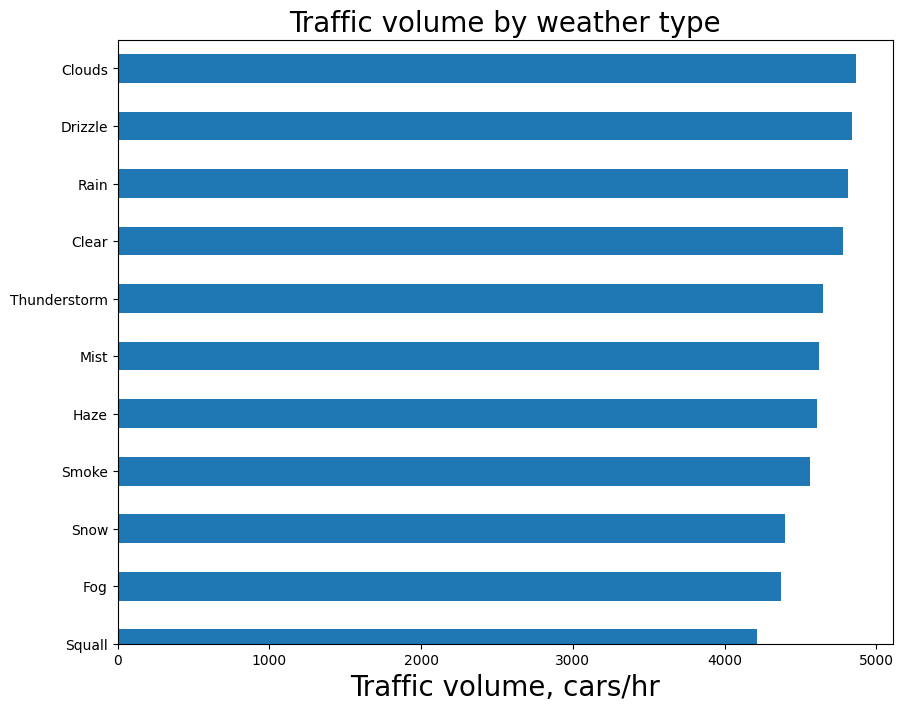

In [85]:
by_weather_main = day.groupby('weather_main').mean().sort_values('traffic_volume')
by_weather_description = day.groupby('weather_description').mean().sort_values('traffic_volume')

plt.figure(figsize=(10,8))
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic volume by weather type', fontsize=20)
plt.xlabel('Traffic volume, cars/hr', fontsize=20)
plt.ylabel(None)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

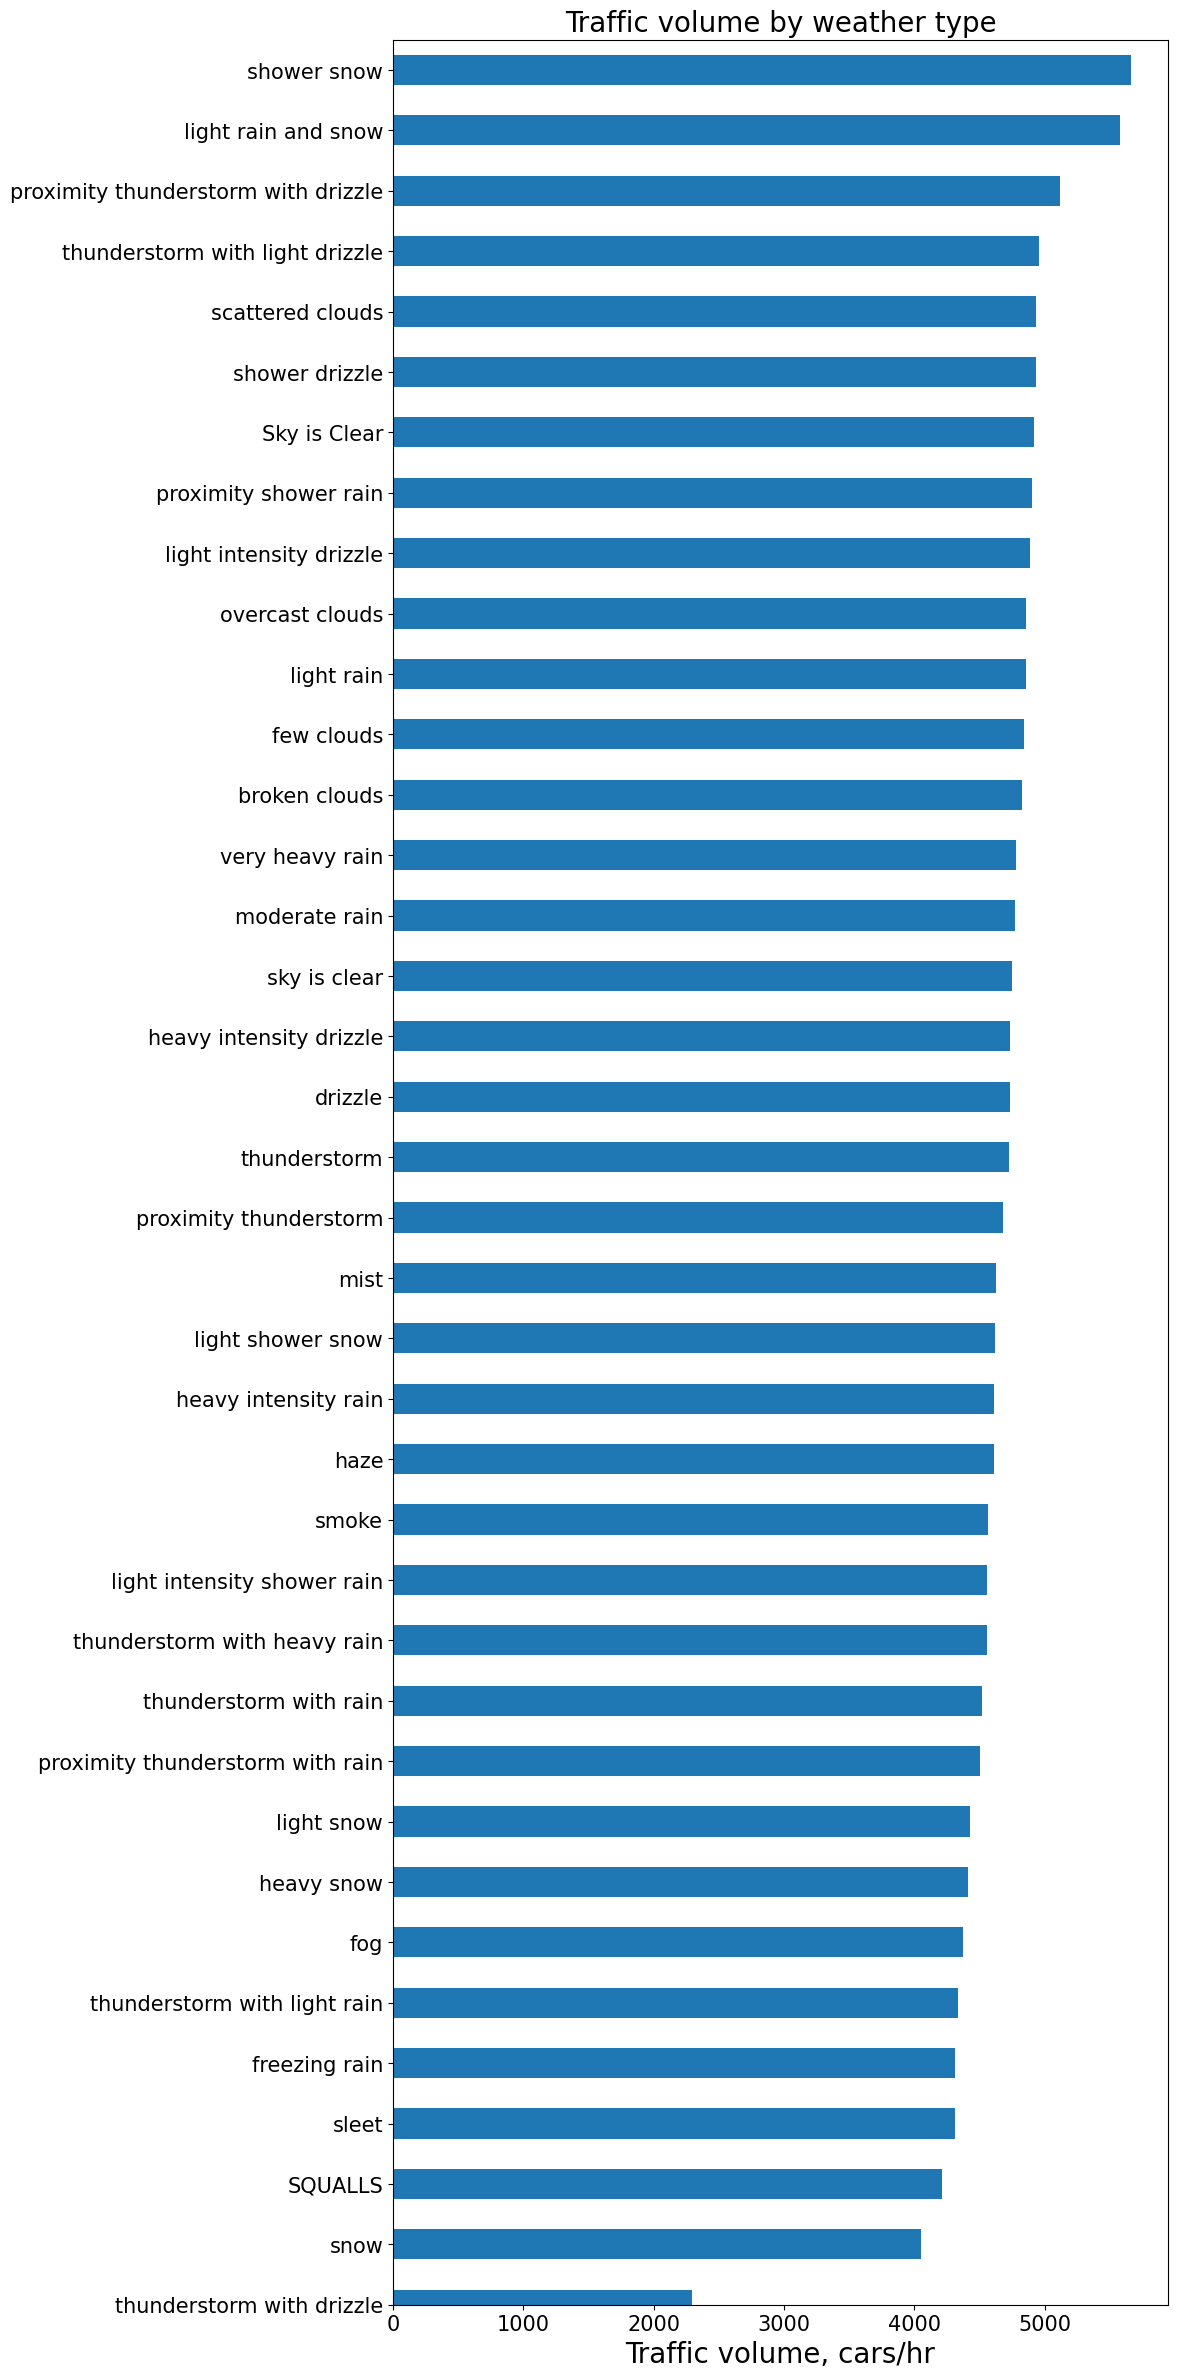

In [87]:
plt.figure(figsize=(10,30))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Traffic volume by weather type', fontsize=20)
plt.xlabel('Traffic volume, cars/hr', fontsize=20)
plt.ylabel(None)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
